In [ ]:

import yfinance as yf

stock_tickers =['META', 'NFLX', 'TSLA','NVDA','AMZN','AAPL','GOOGL','INTC','BAC','OSCR','VALE','RIG'] 

database = yf.download(stock_tickers,start='2012-01-01',end ='2021-12-30',auto_adjust=True)
database = database['Close']
data = database.dropna().pct_change(1).dropna()
data

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


AttributeError: module 'ssl' has no attribute 'wrap_socket'

In [ ]:
import numpy as np
import pandas as pd
import scipy

def sk_Criterion(weight,data):
    Lambda = 3
    W = 1
    Wbar = (1+0.25)/100
    
    portfolio_return = np.multiply(data,np.transpose(weight))
    portfolio_return = portfolio_return.sum(axis=1)
    mean = np.mean(portfolio_return,axis=0)
    std = np.std(portfolio_return,axis=0)
    sk = scipy.stats.skew(portfolio_return,axis=0)
    kurt = scipy.stats.kurtosis(portfolio_return,axis=0)
    
    mv_crite = (Wbar**-1-Lambda)/1+Lambda + (Wbar**-Lambda)*W*mean - 0.5*Lambda*(W**2)*(std**2)*Wbar**(-1-Lambda) 
    
    criterion = mv_crite + ((Lambda*(Lambda+1))/6)*(W**3)*(Wbar**-2-Lambda)*sk -((Lambda*(Lambda+1)*(Lambda+2))/24)*(W**4)*(Wbar**-3-Lambda)*kurt
    criterion = -1*criterion
    
    return criterion


In [ ]:
import numpy as np
from scipy.optimize import minimize

validation_score = 0.3
train_size = int(len(data)*(1-validation_score))
train_data = data.iloc[:train_size,:]
test_data = data.iloc[train_size:,:]

n = train_data.shape[1]
 
# Different initial guess strategy
x0 = np.ones(n)  # Ensures weights sum to 1

# Constraints
cons = ({'type': 'eq', 'fun': lambda x: np.sum(abs(x)) - 1})  # All weights non-negative

# Bounds
Bounds = [(0, 1) for _ in range(n)]

# Optimization with more iterations
res = minimize(sk_Criterion, x0, args=(data,), method='SLSQP', constraints=cons, bounds=Bounds, options={'disp': False})

# Print results
optimal_portfolio_weights = res.x
optimal_portfolio_weights

array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.12898057e-02,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.26859767e-10, 0.00000000e+00, 9.26859767e-10, 9.26859767e-10])

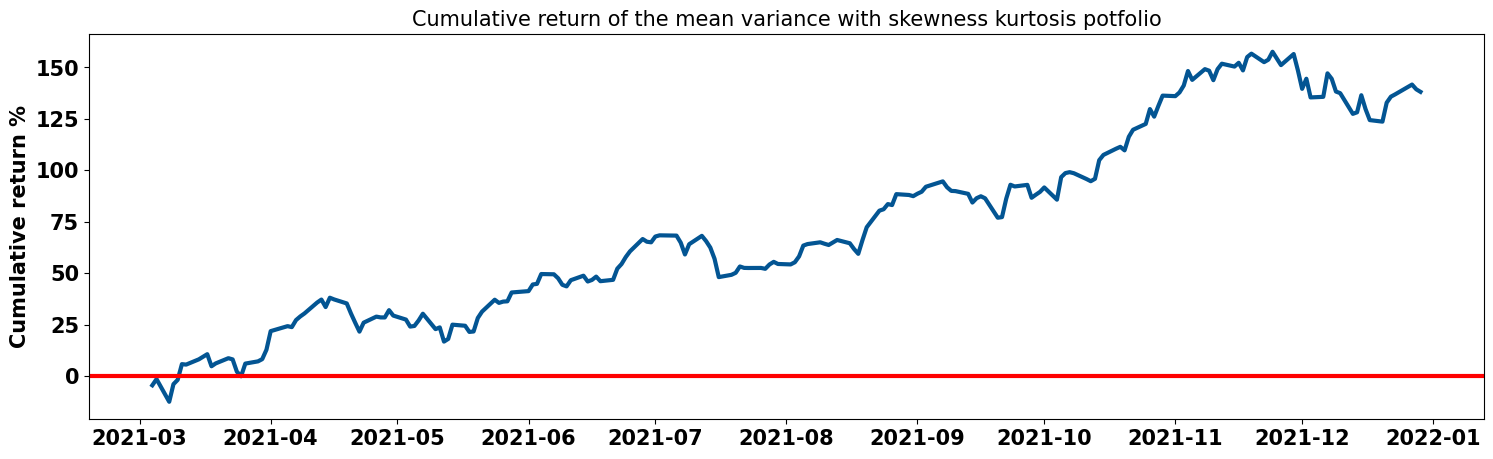

In [ ]:
import matplotlib.pyplot as plt

optimal_portfolio_return=np.multiply(data,np.transpose(optimal_portfolio_weights))
optimal_portfolio_return=optimal_portfolio_return.sum(axis=1)


plt.figure(figsize=(18,5))
plt.plot(np.cumsum(optimal_portfolio_return)*100,color="#035593",linewidth=3)
plt.ylabel("Cumulative return %", size=15,fontweight="bold")
plt.xticks(size=15,fontweight="bold")
plt.yticks(size=15,fontweight="bold")
plt.title("Cumulative return of the mean variance with skewness kurtosis potfolio", size=15)
plt.axhline(0, color="r",linewidth=3)
plt.show()